# Worksheet: time series data exploration
Data and examples from https://keras.io/examples/timeseries/timeseries_weather_forecasting/ 

In [3]:
#! pip install seaborn

In [1]:
# import necessary modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras

2024-11-18 09:54:00.040410: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# download data 
from zipfile import ZipFile

uri = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
zip_path = keras.utils.get_file(origin=uri, fname="jena_climate_2009_2016.csv.zip")
zip_file = ZipFile(zip_path)
zip_file.extractall()
csv_path = "jena_climate_2009_2016.csv"

df = pd.read_csv(csv_path)

13568290/13568290 [==============================] - 1s 0us/step


The table below shows the column names, their value formats, and their description.

| Index |     Features    |        Format       |                                                                                                      Description                                                                                                     |
|:-----:|:---------------:|:-------------------:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
| 1     | Date Time       | 01.01.2009 00:10:00 | Date-time reference                                                                                                                                                                                                  |
| 2     | p (mbar)        | 996.52              | The pascal SI derived unit of pressure used to quantify internal  pressure. Meteorological reports typically state atmospheric pressure in  millibars.                                                               |
| 3     | T (degC)        | -8.02               | Temperature in Celsius                                                                                                                                                                                               |
| 4     | Tpot (K)        | 265.4               | Temperature in Kelvin                                                                                                                                                                                                |
| 5     | Tdew (degC)     | -8.9                | Temperature in Celsius relative to humidity. Dew Point is a measure  of the absolute amount of water in the air, the DP is the temperature at  which the air cannot hold all the moisture in it and water condenses. |
| 6     | rh (%)          | 93.3                | Relative Humidity is a measure of how saturated the air is with  water vapor, the %RH determines the amount of water contained within  collection objects.                                                           |
| 7     | VPmax (mbar)    | 3.33                | Saturation vapor pressure                                                                                                                                                                                            |
| 8     | VPact (mbar)    | 3.11                | Vapor pressure                                                                                                                                                                                                       |
| 9     | VPdef (mbar)    | 0.22                | Vapor pressure deficit                                                                                                                                                                                               |
| 10    | sh (g/kg)       | 1.94                | Specific humidity                                                                                                                                                                                                    |
| 11    | H2OC (mmol/mol) | 3.12                | Water vapor concentration                                                                                                                                                                                            |
| 12    | rho (g/m ** 3)  | 1307.75             | Airtight                                                                                                                                                                                                             |
| 13    | wv (m/s)        | 1.03                | Wind speed                                                                                                                                                                                                           |
| 14    | max. wv (m/s)   | 1.75                | Maximum wind speed                                                                                                                                                                                                   |
| 15    | wd (deg)        | 152.3               | Wind direction in degrees                                                                                                                                                                                            |


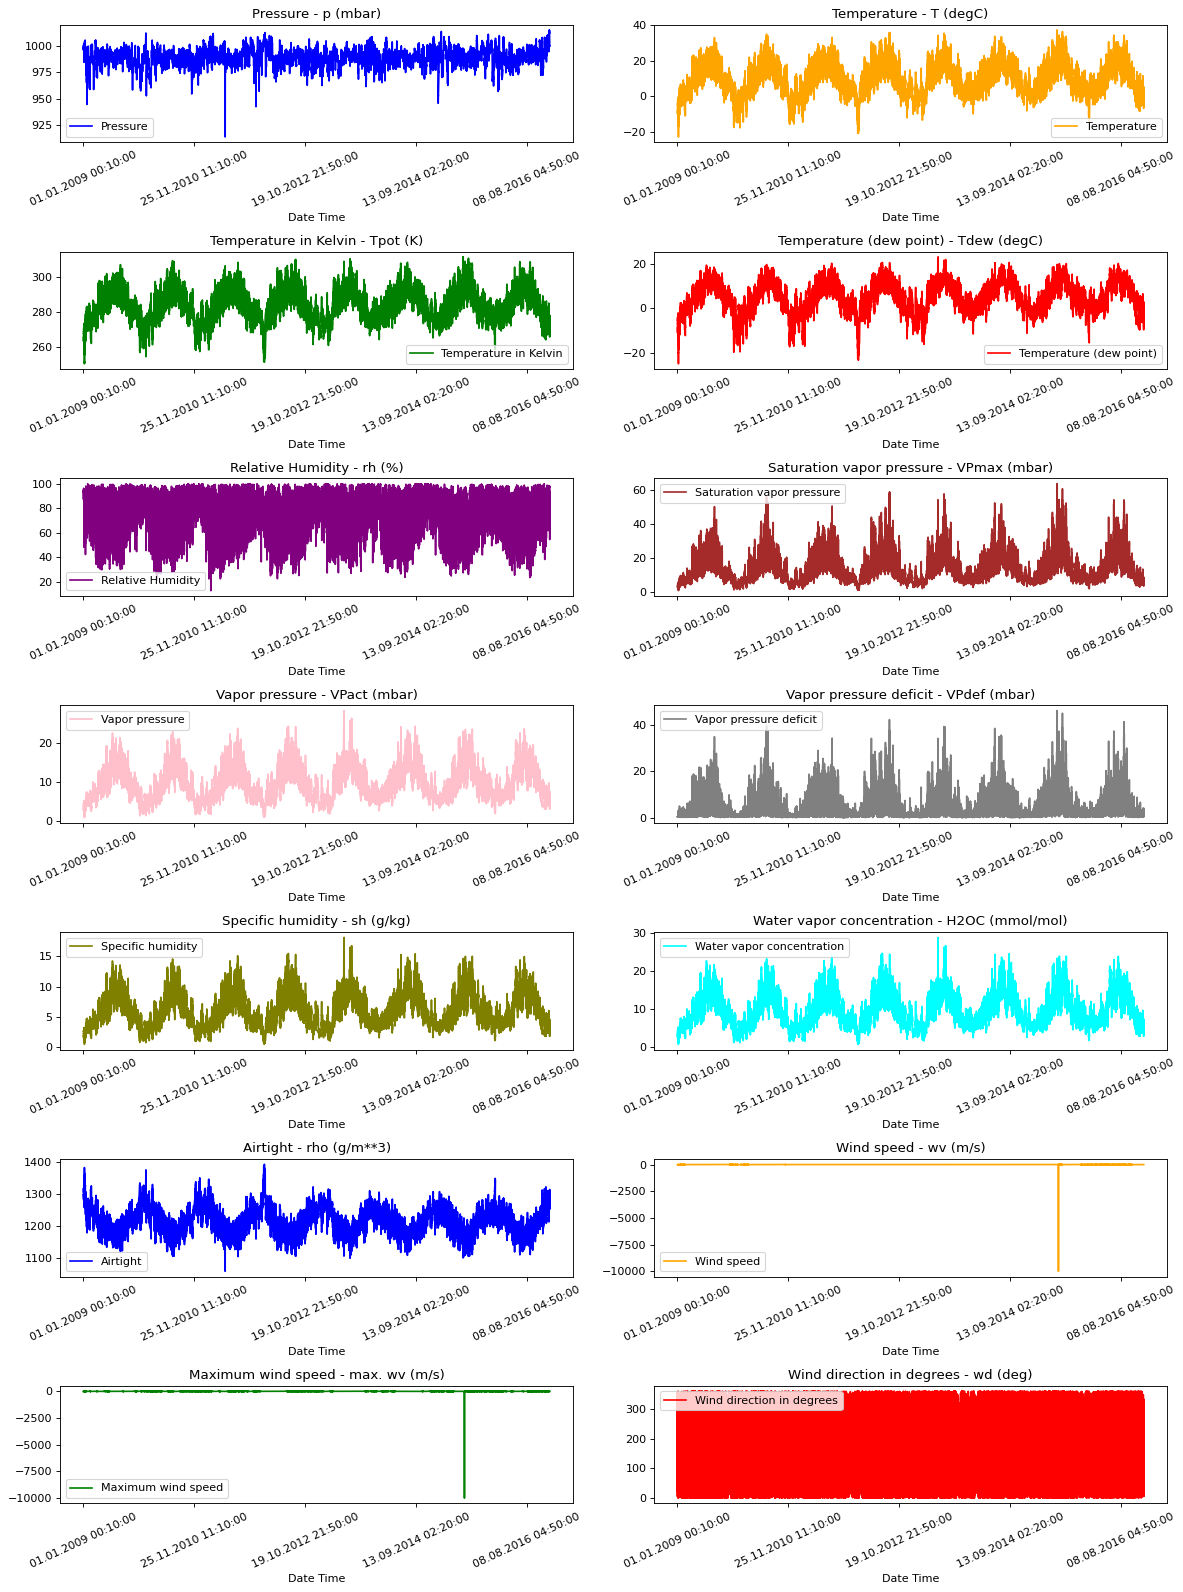

In [3]:
# visualise the raw data 
titles = [
    "Pressure",
    "Temperature",
    "Temperature in Kelvin",
    "Temperature (dew point)",
    "Relative Humidity",
    "Saturation vapor pressure",
    "Vapor pressure",
    "Vapor pressure deficit",
    "Specific humidity",
    "Water vapor concentration",
    "Airtight",
    "Wind speed",
    "Maximum wind speed",
    "Wind direction in degrees",
]

feature_keys = [
    "p (mbar)",
    "T (degC)",
    "Tpot (K)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

date_time_key = "Date Time"


def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(df)


In [4]:
# see how data look like 
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [5]:
# set date time as the index 
df = df.set_index(['Date Time'])
df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2


In [6]:
# show summary of the data 
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


In [7]:
# clean bad values 
df = df[df['wv (m/s)'] != -9999.0]
df = df[df['max. wv (m/s)'] != -9999.0]
df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2


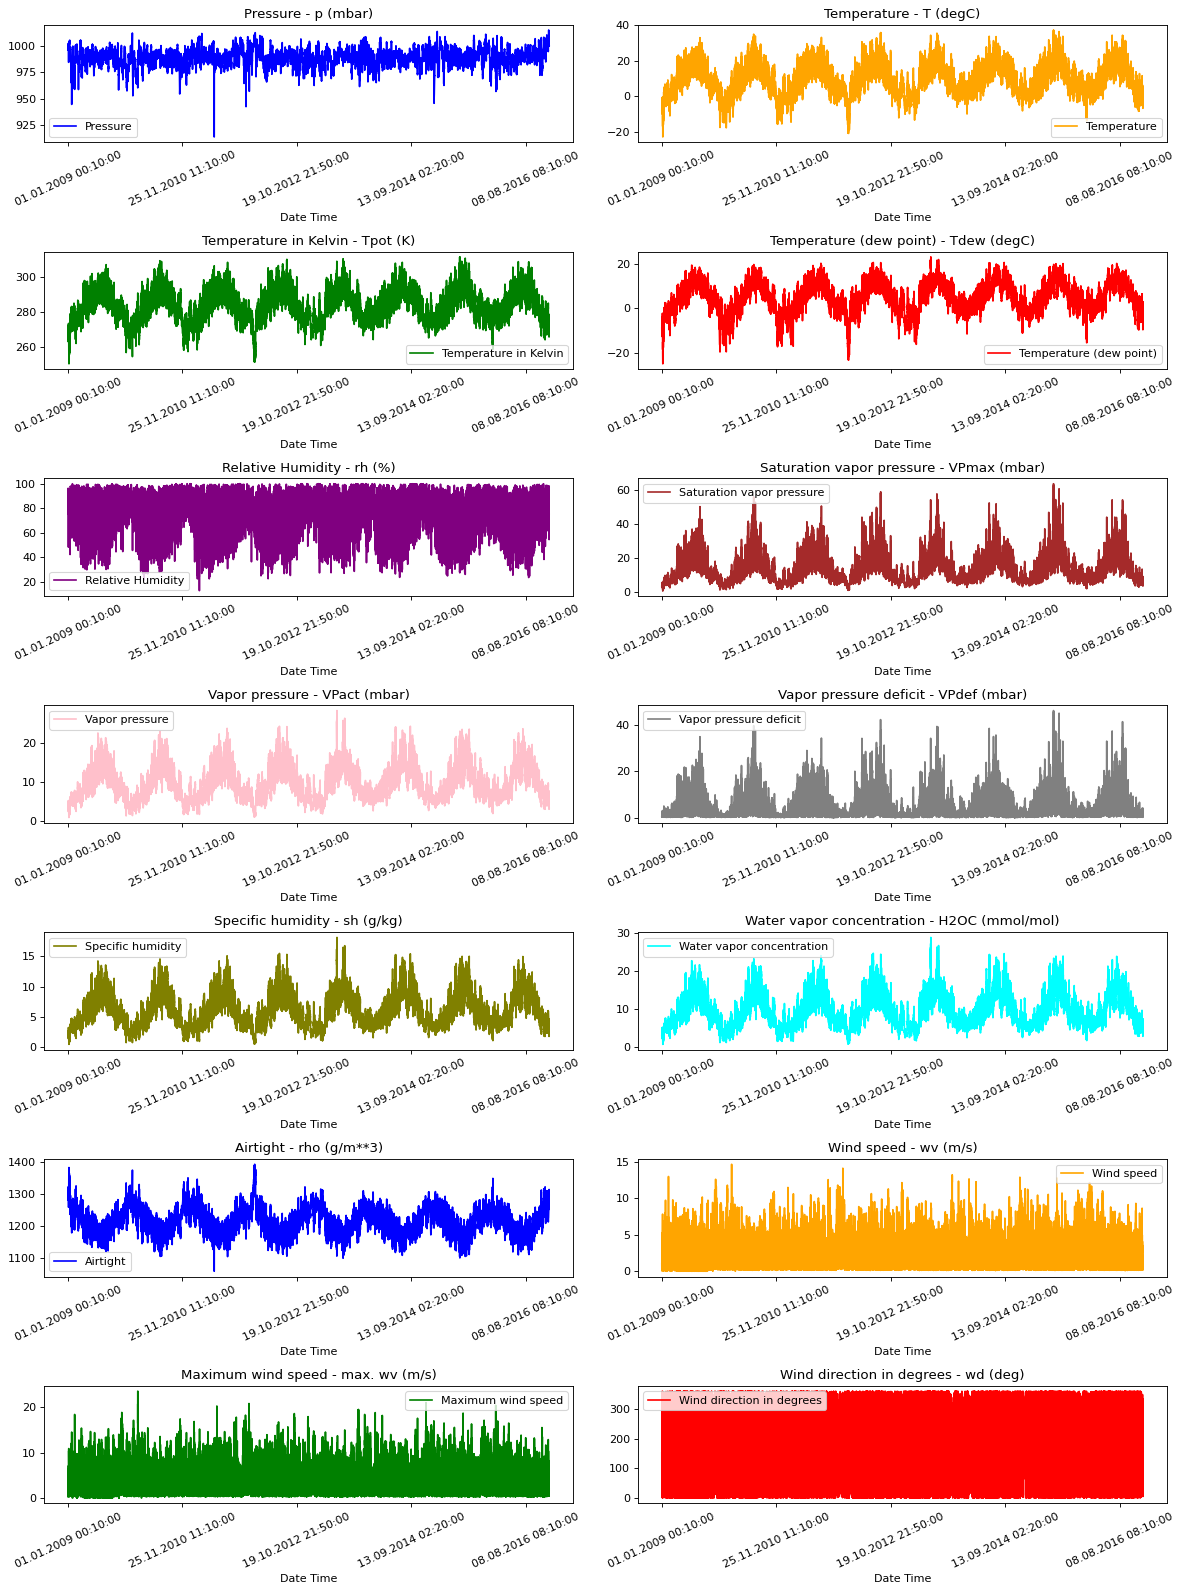

In [8]:
# visualise the data after cleaning
df = df.reset_index() # reset the index to use the visualisation function 
show_raw_visualization(df)

In [9]:
# see linear correlation between the variables 
df = df.set_index(['Date Time'])
corr = df.corr()

## Visualise correlation matrix (linear/Pearson correlation)

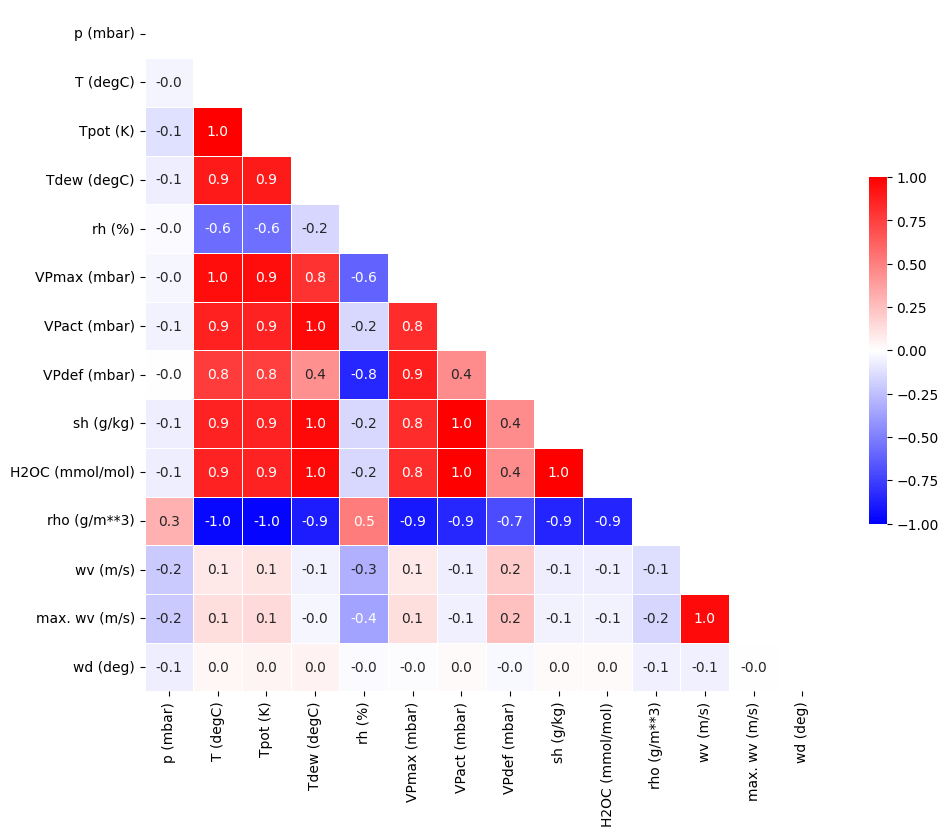

In [10]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='bwr', vmax=1.0, vmin=-1.0, center=0,
                 square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
                 annot=True, fmt=".1f") 
plt.show()

In [11]:
# take a reduced dataset to work with less variables for now
reduced_df = df[['p (mbar)', 'T (degC)', 'rh (%)', 'H2OC (mmol/mol)', 'wv (m/s)']]
reduced_df

,p (mbar),T (degC),rh (%),H2OC (mmol/mol),wv (m/s)
Date Time,,,,,
01.01.2009 00:10:00,996.52,-8.02,93.30,3.12,1.03
01.01.2009 00:20:00,996.57,-8.41,93.40,3.03,0.72
01.01.2009 00:30:00,996.53,-8.51,93.90,3.02,0.19
01.01.2009 00:40:00,996.51,-8.31,94.20,3.08,0.34
01.01.2009 00:50:00,996.51,-8.27,94.10,3.09,0.32
...,...,...,...,...,...
31.12.2016 23:20:00,1000.07,-4.05,73.10,3.30,0.67
31.12.2016 23:30:00,999.93,-3.35,69.71,3.32,1.14
31.12.2016 23:40:00,999.82,-3.16,67.91,3.28,1.08


In [12]:
# Rename the columns 
reduced_df.columns = ['Pressure', 'Temperature','RelativeHumidity', 'WaterConcentration', 'WindSpeed']
reduced_df

,Pressure,Temperature,RelativeHumidity,WaterConcentration,WindSpeed
Date Time,,,,,
01.01.2009 00:10:00,996.52,-8.02,93.30,3.12,1.03
01.01.2009 00:20:00,996.57,-8.41,93.40,3.03,0.72
01.01.2009 00:30:00,996.53,-8.51,93.90,3.02,0.19
01.01.2009 00:40:00,996.51,-8.31,94.20,3.08,0.34
01.01.2009 00:50:00,996.51,-8.27,94.10,3.09,0.32
...,...,...,...,...,...
31.12.2016 23:20:00,1000.07,-4.05,73.10,3.30,0.67
31.12.2016 23:30:00,999.93,-3.35,69.71,3.32,1.14
31.12.2016 23:40:00,999.82,-3.16,67.91,3.28,1.08


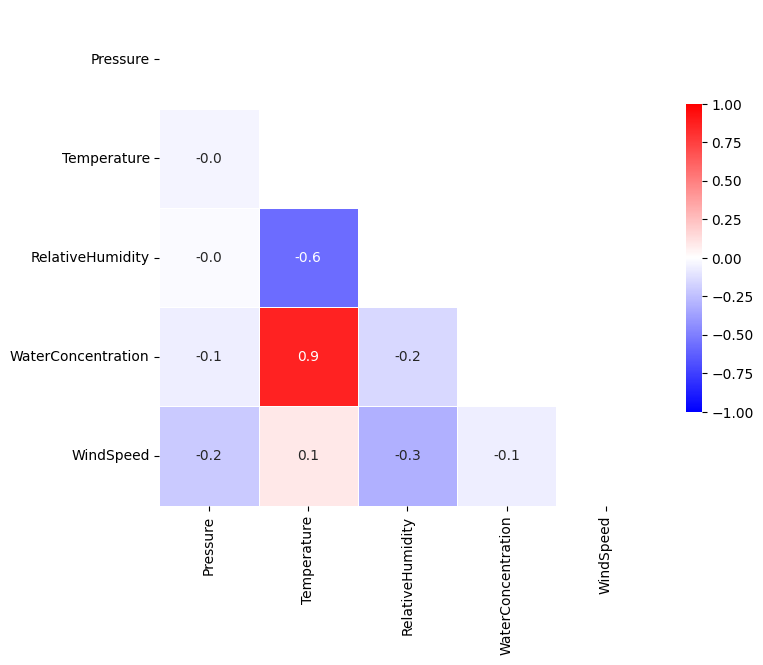

In [13]:
# Plot the correlation. There should be less redundancy this time. 
corr = reduced_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='bwr', vmax=1.0, vmin=-1.0, center=0,
                 square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
                 annot=True, fmt=".1f") 
plt.show()

## Explore Nonlinear Correlation with Mutual Information 

In [14]:
from sklearn.feature_selection import mutual_info_regression as mi_reg

In [16]:
# define independent variables in the reduced dataset 
indep_vars = ['Pressure','RelativeHumidity', 'WaterConcentration', 'WindSpeed'] # set independent vars
dep_vars = reduced_df.columns.difference(indep_vars).tolist() # set dependent vars
print(indep_vars)
print(dep_vars)

['Pressure', 'RelativeHumidity', 'WaterConcentration', 'WindSpeed']
['Temperature']


In [17]:
# Compute mutual information (nonlinear correlation) between independent and dependent variables 
reduceddf_mi = pd.DataFrame([mi_reg(reduced_df[indep_vars], reduced_df[dep_var]) for dep_var in dep_vars], index = dep_vars, columns = indep_vars).apply(lambda x: x / x.max(), axis = 1)
reduceddf_mi

,Pressure,RelativeHumidity,WaterConcentration,WindSpeed
Temperature,0.173104,0.253693,1.0,0.02441


### Plot the mutual information 

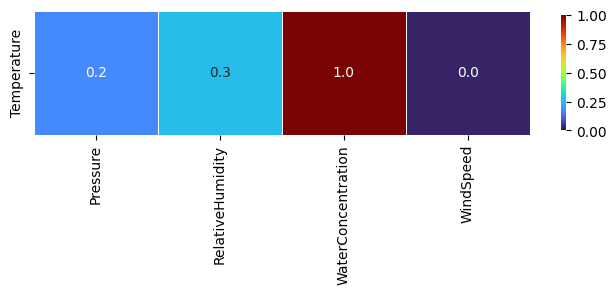

In [18]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8,3))

ax = sns.heatmap(reduceddf_mi, square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, fmt=".1f", cmap='turbo', vmin=0.0, vmax=1.0)
plt.show()

# Try modeling the temperature with random forest regression 
### Since the dataset is large, we will resample it first to work with a smaller dataset. 

### Format the "Date Time" so that it is understood by Pandas. Then we make it as the index for easy handling. 

In [19]:
reduced_df = reduced_df.reset_index()
reduced_df['Date Time'] = pd.to_datetime(reduced_df['Date Time'], dayfirst=True)
reduced_df = reduced_df.set_index(['Date Time'])
reduced_df

,Pressure,Temperature,RelativeHumidity,WaterConcentration,WindSpeed
Date Time,,,,,
2009-01-01 00:10:00,996.52,-8.02,93.30,3.12,1.03
2009-01-01 00:20:00,996.57,-8.41,93.40,3.03,0.72
2009-01-01 00:30:00,996.53,-8.51,93.90,3.02,0.19
2009-01-01 00:40:00,996.51,-8.31,94.20,3.08,0.34
2009-01-01 00:50:00,996.51,-8.27,94.10,3.09,0.32
...,...,...,...,...,...
2016-12-31 23:20:00,1000.07,-4.05,73.10,3.30,0.67
2016-12-31 23:30:00,999.93,-3.35,69.71,3.32,1.14
2016-12-31 23:40:00,999.82,-3.16,67.91,3.28,1.08


### Resample from 10-min cadence to 1-hour cadence using hourly mean

In [20]:
# Resample data using hourly mean 
reduced_df = reduced_df.resample('1h').mean().interpolate()
reduced_df

,Pressure,Temperature,RelativeHumidity,WaterConcentration,WindSpeed
Date Time,,,,,
2009-01-01 00:00:00,996.528000,-8.304000,93.780000,3.068000,0.520000
2009-01-01 01:00:00,996.525000,-8.065000,93.933333,3.133333,0.316667
2009-01-01 02:00:00,996.745000,-8.763333,93.533333,2.950000,0.248333
2009-01-01 03:00:00,996.986667,-8.896667,93.200000,2.906667,0.176667
2009-01-01 04:00:00,997.158333,-9.348333,92.383333,2.780000,0.290000
...,...,...,...,...,...
2016-12-31 20:00:00,1001.410000,-2.503333,71.080000,3.596667,0.923333
2016-12-31 21:00:00,1001.063333,-2.653333,72.016667,3.611667,0.573333
2016-12-31 22:00:00,1000.511667,-3.553333,74.916667,3.513333,0.816667


### Visualise the data

In [21]:
input_features = ['Pressure','RelativeHumidity', 'WaterConcentration','WindSpeed']
output_target = ['Temperature']

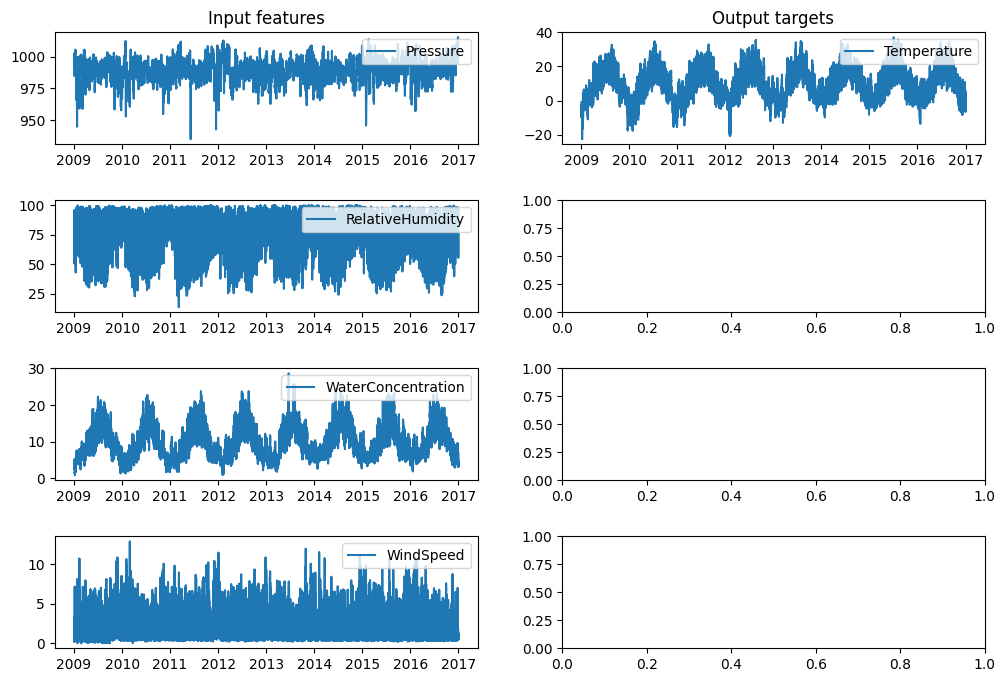

In [22]:
fig, ax = plt.subplots(len(input_features), 2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)

i = 0
for col in input_features:
    if i < len(input_features):
        ax[i,0].plot(reduced_df[col], label=col)
        ax[i,0].legend(loc='upper right',bbox_to_anchor=(1.0, 1.0))
        i += 1 
    
j = 0
for col in output_target:
    if j < len(output_target):
        ax[j,1].plot(reduced_df[col], label=col)
        ax[j,1].legend(loc='upper right',bbox_to_anchor=(1.0, 1.0))
        j += 1
    

ax[0,0].set_title('Input features')

ax[0,1].set_title('Output targets')

plt.show()

## Divide the data to train:validation:test

In [23]:
from datetime import datetime

In [24]:
# fix column order 
reduced_df = reduced_df[['Pressure','RelativeHumidity', 'WaterConcentration','WindSpeed','Temperature']]

# define training data from 2009 to end of 2012 (5 years)
reduced_df_train = reduced_df[datetime(2009,1,1,0,0,0):datetime(2012,12,31,23,0,0)]

# define validation data in 2013 
reduced_df_val = reduced_df[datetime(2013,1,1,0,0,0):datetime(2013,12,31,23,0,0)]

# define test data in 2014 
reduced_df_test = reduced_df[datetime(2014,1,1,0,0,0):datetime(2014,12,31,23,0,0)]

## Obtain scaling from the training data

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
## Scale the data frame
scaler = MinMaxScaler()

## Obtain scaler based on the "train" data
df_train_scaled = scaler.fit_transform(reduced_df_train)

## Convert from dataframe to 2D array
print('Train data: \n',df_train_scaled)
print(df_train_scaled.shape)

Train data: 
 [[0.79135739 0.92793976 0.09746863 0.04032571 0.24664394]
 [0.79131886 0.92971616 0.10031189 0.02455732 0.250752  ]
 [0.79414409 0.92508206 0.09233336 0.01925811 0.23874868]
 ...
 [0.6334061  0.62716741 0.2675709  0.45741243 0.51207494]
 [0.62923248 0.62297741 0.26597519 0.37417604 0.51201765]
 [0.62726339 0.66103495 0.26285631 0.24621946 0.49769387]]
(35064, 5)


### Save the scaler for use later

In [27]:
from pickle import dump

# save the scaler
dump(scaler, open('Scaler_temperature-prediction.pkl', 'wb'))

### Apply the scaling obtained from the "train" data to "validation" and "test" data

In [28]:
df_val_scaled = scaler.transform(reduced_df_val)
df_test_scaled = scaler.transform(reduced_df_test)

print('Validation data: \n',df_val_scaled)
print(df_val_scaled.shape)

print('Test data: \n',df_test_scaled)
print(df_test_scaled.shape)

Validation data: 
 [[0.62052138 0.69743194 0.26205846 0.17383999 0.48597702]
 [0.60740122 0.69743194 0.25741641 0.19826806 0.48188043]
 [0.59789821 0.71075497 0.25357221 0.26664082 0.47474719]
 ...
 [0.69560378 0.70032825 0.16580837 0.21687993 0.39247142]
 [0.68892599 0.6871983  0.16501052 0.28085821 0.39502106]
 [0.68359659 0.6949218  0.1618191  0.20873724 0.38900507]]
(8760, 5)
Test data: 
 [[0.67319464 0.67986098 0.15935301 0.2073155  0.39012233]
 [0.66611018 0.61704962 0.15739465 0.23626729 0.40602171]
 [0.66191516 0.59171655 0.15753971 0.20395502 0.41395709]
 ...
 [0.92314113 0.9814636  0.26329151 0.0558356  0.42303836]
 [0.92513163 0.984553   0.26517734 0.04704666 0.42395508]
 [0.92814948 0.98590461 0.26822369 0.03192452 0.42621824]]
(8760, 5)


## Define X (independent variables) and y (dependent variables)

### Training data 

In [29]:
## Get input 'X'
X_train = df_train_scaled[:,0:len(input_features)]

print('X train = \n',X_train)
print(X_train.shape)

## Get output 'y'
y_train = df_train_scaled[:,len(input_features):len(input_features)+len(output_target)]

print('y train = \n',y_train)
print(y_train.shape)

X train = 
 [[0.79135739 0.92793976 0.09746863 0.04032571]
 [0.79131886 0.92971616 0.10031189 0.02455732]
 [0.79414409 0.92508206 0.09233336 0.01925811]
 ...
 [0.6334061  0.62716741 0.2675709  0.45741243]
 [0.62923248 0.62297741 0.26597519 0.37417604]
 [0.62726339 0.66103495 0.26285631 0.24621946]]
(35064, 4)
y train = 
 [[0.24664394]
 [0.250752  ]
 [0.23874868]
 ...
 [0.51207494]
 [0.51201765]
 [0.49769387]]
(35064, 1)


### Validation and test data 

In [30]:
X_val = df_val_scaled[:,0:len(input_features)]
X_test = df_test_scaled[:,0:len(input_features)]

y_val = df_val_scaled[:,len(input_features):len(input_features)+len(output_target)]
y_test = df_test_scaled[:,len(input_features):len(input_features)+len(output_target)]

# Train the model with Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
%%time

model = RandomForestRegressor()

# Fit the model with Random Forest Regressor 
model.fit(X_train, y_train.ravel())

# Evaluate model performance on the train and validation data 
r2_train = model.score(X_train, y_train.ravel())
r2_val = model.score(X_val, y_val.ravel())

print(f"model score on training data: {r2_train}")
print(f"model score on validation data: {r2_val}")

model score on training data: 0.9999679878881829
model score on validation data: 0.9995262094986959
CPU times: user 12.1 s, sys: 139 ms, total: 12.2 s
Wall time: 12.3 s


## With Random Forest, it is possible to obtain feature importance 

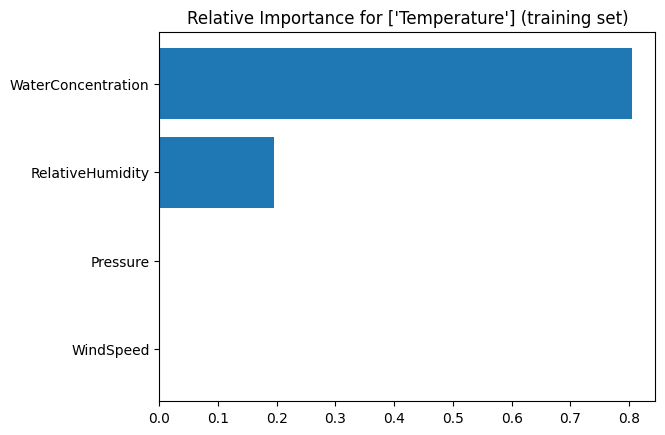

In [33]:
importances = model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(input_features)[indices])
ax.set_title('Relative Importance for {} (training set)'.format(output_target))

plt.show()


### Model prediction 

In [34]:
y_predict = model.predict(X_test)
y_predict

array([0.39073853, 0.40414731, 0.4153167 , ..., 0.42106225, 0.42055634,
       0.42387859])

## Quickly visualise the result on the test set

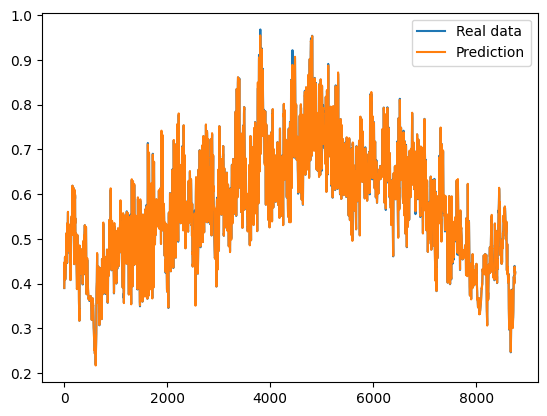

In [35]:
plt.plot(y_test, label='Real data')
plt.plot(y_predict, label='Prediction')
plt.legend()
plt.show()

## Scale back the data 

## Concatenate the scaled 'X_test' and the 'y_predict' for using the inverse scaling

In [36]:
predict_scaled = np.concatenate((X_test,y_predict.reshape((len(y_predict), 1))), axis=1)
print(predict_scaled.shape)
print(predict_scaled)

(8760, 5)
[[0.67319464 0.67986098 0.15935301 0.2073155  0.39073853]
 [0.66611018 0.61704962 0.15739465 0.23626729 0.40414731]
 [0.66191516 0.59171655 0.15753971 0.20395502 0.4153167 ]
 ...
 [0.92314113 0.9814636  0.26329151 0.0558356  0.42106225]
 [0.92513163 0.984553   0.26517734 0.04704666 0.42055634]
 [0.92814948 0.98590461 0.26822369 0.03192452 0.42387859]]


## Perform inverse scaling

In [37]:
predict = scaler.inverse_transform(predict_scaled)
print(predict)
print(predict.shape)

[[9.87326667e+02 7.23666667e+01 4.49000000e+00 2.67333333e+00
  7.91833333e-02]
 [9.86775000e+02 6.69450000e+01 4.44500000e+00 3.04666667e+00
  8.59283333e-01]
 [9.86448333e+02 6.47583333e+01 4.44833333e+00 2.63000000e+00
  1.50910000e+00]
 ...
 [1.00679000e+03 9.84000000e+01 6.87833333e+00 7.20000000e-01
  1.84336667e+00]
 [1.00694500e+03 9.86666667e+01 6.92166667e+00 6.06666667e-01
  1.81393333e+00]
 [1.00718000e+03 9.87833333e+01 6.99166667e+00 4.11666667e-01
  2.00721667e+00]]
(8760, 5)


## Make a dataframe for the output

In [38]:
df_predict = pd.DataFrame(predict)
df_predict.columns = ['Pressure','RelativeHumidity', 'WaterConcentration','WindSpeed', 'Temperature']
df_predict['time'] = reduced_df_test.index
df_predict = df_predict.set_index(['time'])
df_predict

,Pressure,RelativeHumidity,WaterConcentration,WindSpeed,Temperature
time,,,,,
2014-01-01 00:00:00,987.326667,72.366667,4.490000,2.673333,0.079183
2014-01-01 01:00:00,986.775000,66.945000,4.445000,3.046667,0.859283
2014-01-01 02:00:00,986.448333,64.758333,4.448333,2.630000,1.509100
2014-01-01 03:00:00,986.171667,62.033333,4.478333,1.825000,2.169067
2014-01-01 04:00:00,986.251667,58.221667,4.401667,0.908333,2.706567
...,...,...,...,...,...
2014-12-31 19:00:00,1006.255000,97.900000,6.960000,0.641667,2.071217
2014-12-31 20:00:00,1006.430000,98.216667,6.951667,0.680000,2.027950
2014-12-31 21:00:00,1006.790000,98.400000,6.878333,0.720000,1.843367


## Visualise model prediction 

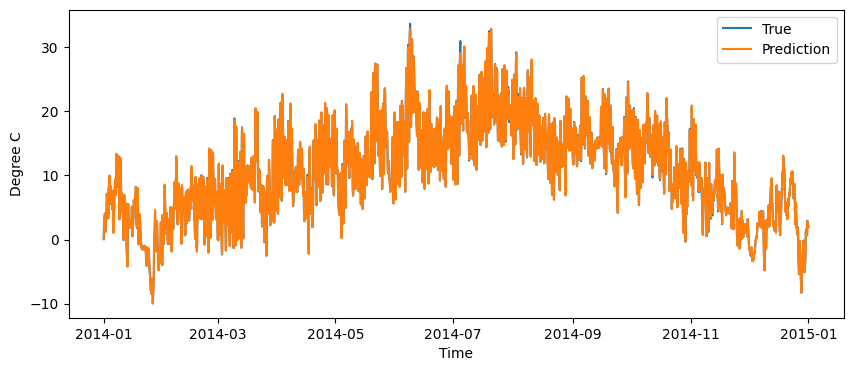

In [39]:
fig = plt.figure(figsize=(10,4))
plt.subplots_adjust(hspace=0.2)

ax1 = fig.add_subplot(1,1,1)
ax1.plot(reduced_df_test['Temperature'], label='True')
ax1.plot(df_predict['Temperature'], label='Prediction')
ax1.legend()
ax1.set_xlabel('Time')
ax1.set_ylabel('Degree C')

plt.show()